<a href="https://colab.research.google.com/github/laredein/MyPyTorchTest/blob/master/kerastitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/laredein/MyPyTorch
import sys
sys.path.append('/content/MyPyTorch')
 
import keras
from keras.layers import Activation,Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
 
x=pd.read_csv("/content/MyPyTorch/full.csv")
 
 
x=x.drop(columns="Name")
x=x.drop(columns="Ticket")
x=x.drop(columns="Cabin")
x=x.drop(columns="Embarked")
x=x.drop(columns="Name_wiki")
x=x.drop(columns="Boarded")
x=x.drop(columns="Destination")
x=x.drop(columns="Lifeboat")
x=x.drop(columns="Body")
x=x.drop(columns="Class")
x=x.drop(columns="WikiId")
x=x.drop(columns="PassengerId")
x=x.drop(columns="Hometown")
x.head()

Cloning into 'MyPyTorch'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 41 (delta 17), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (41/41), done.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_wiki
0,0.0,3,male,22.0,1,0,7.2500,22.0
1,1.0,1,female,38.0,1,0,71.2833,35.0
2,1.0,3,female,26.0,0,0,7.9250,26.0
3,1.0,1,female,35.0,1,0,53.1000,35.0
4,0.0,3,male,35.0,0,0,8.0500,35.0


In [2]:
x.loc[pd.isna(x["Age"]), :]
x.dropna(subset=["Survived"],inplace=True)
x.loc[pd.notna(x["Age"]),"Age"]=x["Age"]
x.loc[pd.isna(x["Age"]),"Age"]=x["Age_wiki"]
x=x.drop(columns="Age_wiki")
c=x["Age"].mean(skipna=True)
x.loc[pd.isna(x["Age"]),"Age"]=c
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,male,22.0,1,0,7.2500
1,1.0,1,female,38.0,1,0,71.2833
2,1.0,3,female,26.0,0,0,7.9250
3,1.0,1,female,35.0,1,0,53.1000
4,0.0,3,male,35.0,0,0,8.0500


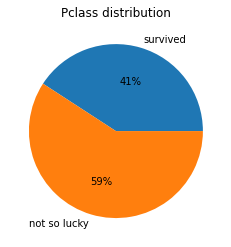

In [3]:
labelenc=LabelEncoder()
x["Survived"]=labelenc.fit_transform(x["Survived"])
xtrain,xtest=train_test_split(x,test_size=0.7)
xtrain.index=pd.RangeIndex(start=0,stop=len(xtrain),step=1)
xtest.index=pd.RangeIndex(start=0,stop=len(xtest),step=1)
one=xtrain.loc[xtrain["Survived"]==1]["Survived"].sum()
two=len(xtrain)-one
plt.pie([one,two],labels=["survived","not so lucky"],autopct="%0.0f%%")
plt.title("Pclass distribution")
plt.show()

In [4]:
c=len(xtrain)-one*2
addarr=[]
for i in range(len(xtrain)):
    if xtrain.iloc[i][0]==1:
        addarr.append(xtrain.iloc[i,:])
addarr=pd.DataFrame(addarr,columns=["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"])
addarr.index=pd.RangeIndex(start=0,stop=len(addarr),step=1)
for i in range(c):
  xtrain=xtrain.append(addarr.iloc[i%len(addarr),:])
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


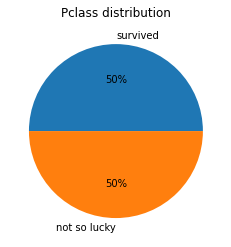

In [5]:
one=xtrain.loc[xtrain["Survived"]==1]["Survived"].sum()
two=len(xtrain)-one
plt.pie([one,two],labels=["survived","not so lucky"],autopct="%0.0f%%")
plt.title("Pclass distribution")
plt.show()

In [6]:
pd.set_option('mode.chained_assignment', None)
sextoint=OneHotEncoder(sparse=False)
xtrain['Sex']=sextoint.fit_transform(xtrain['Sex'].values.reshape(-1,1))
xtest['Sex']=sextoint.fit_transform(xtest['Sex'].values.reshape(-1,1))
ytrain=xtrain["Survived"]
xtrain=xtrain.drop(columns="Survived")
ytest=xtest["Survived"]
xtest=xtest.drop(columns="Survived")
ssc=StandardScaler()

a=ssc.fit_transform(xtrain)
b=ssc.fit_transform(xtest)
c=np.array(ytrain)
d=np.array(ytest)
xtrain=b
xtest=a
ytrain=d
ytest=c
xtrain[:5]

array([[ 0.81300696, -0.73793933,  0.65319464, -0.47786569, -0.47835846,
        -0.48209119],
       [ 0.81300696, -0.73793933,  0.21432318, -0.47786569, -0.47835846,
        -0.46541462],
       [ 0.81300696, -0.73793933, -0.88285548, -0.47786569, -0.47835846,
        -0.45135866],
       [-1.60855077,  1.35512495,  0.87263037, -0.47786569, -0.47835846,
         1.94696972],
       [ 0.81300696,  1.35512495, -2.0714657 ,  1.22606682,  0.68764029,
        -0.24941403]])

In [7]:
 
network=keras.models.Sequential()
layer1=Dense(3,input_shape=(6,),activation='sigmoid')
layer2=Dense(2,activation='sigmoid')
layer3=Dense(1,activation='sigmoid')
network.add(layer1)
network.add(layer2)
network.add(layer3)
 
optimiser=keras.optimizers.SGD(learning_rate=1,momentum=0.2)
network.compile(optimizer=optimiser,loss='mse',metrics=['mse'])
history=network.fit(xtrain,ytrain,epochs=300,batch_size=len(xtrain))
pr=network.predict(xtest)
pr=pr.round()
print(accuracy_score(pr,ytest))

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2447 - mse: 0.2447
Epoch 2/300
1/1 [==============================] - 0s 931us/step - loss: 0.2436 - mse: 0.2436
Epoch 3/300
1/1 [==============================] - 0s 3ms/step - loss: 0.2427 - mse: 0.2427
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2419 - mse: 0.2419
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2414 - mse: 0.2414
Epoch 6/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2410 - mse: 0.2410
Epoch 7/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2406 - mse: 0.2406
Epoch 8/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2404 - mse: 0.2404
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 0.2402 - mse: 0.2402
Epoch 10/300
1/1 [==============================] - 0s 1ms/step - loss: 0.2400 - mse: 0.2400
Epoch 11/300
1/1 [==============================] - 0s 2ms/step - loss: 0.239